# Constructing paths from pathitems

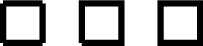

In [1]:
from pyx import *

c = canvas.canvas()

rect1 = path.path(path.moveto(0, 0), path.lineto(1, 0),
                  path.moveto(1, 0), path.lineto(1, 1),
                  path.moveto(1, 1), path.lineto(0, 1),
                  path.moveto(0, 1), path.lineto(0, 0))
rect2 = path.path(path.moveto(2, 0), path.lineto(3, 0),
                  path.lineto(3, 1), path.lineto(2, 1),
                  path.lineto(2, 0))
rect3 = path.path(path.moveto(4, 0), path.lineto(5, 0),
                  path.lineto(5, 1), path.lineto(4, 1),
                  path.closepath())

c.stroke(rect1, [style.linewidth.THICK])
c.stroke(rect2, [style.linewidth.THICK])
c.stroke(rect3, [style.linewidth.THICK])

c

In this example, some simple paths are constructed out of pathitems, which are
the basic building blocks of paths. While we only use `moveto`, `lineto` and
`closepath` instances, we can already see some features of paths in PyX. 

In the first path instance `rect1`, we alternatingly use `moveto` and `lineto`
pathitem instances. A `moveto` instance sets an internal *current point*,
while a `lineto` instance additionally creates a straight line connecting the
old and the new *current point*. Due to the intermediate `moveto`
instances, we generate a path which contains 4 separate subpaths. When
stroking this path with a thick linewidth in order to show the details, the
corners of the result exhibits that the individual lines are not connected.

In the second case `rect2`, we skip the intermediate `moveto` instances. The
default join method between pathitems within a single subpath is to miter them.
This results in a different rendering except for the start and end point of the
path.

In order to get rid of the ragged effect at the corners, we close the path as
shown by `rect3`. Here, one can (and should) skip the last connecting line since
a `closepath` pathitem implicitly adds a straight connection line between the
first and the last point of the subpath.

<img src="http://pyx.sourceforge.net/bend.png" align="left"> PyX resembles the full PostScript path model. The whole PostScript path
construction functionality is available by means of pathitems and the resulting
PostScript code will make use of the corresponding PostScript operators. For
PDF output, where some of the PostScript features are not available (all forms
of arcs are missing in PDF), proper replacement code is generated automatically.

<img src="http://pyx.sourceforge.net/bend.png" align="left"><img src="http://pyx.sourceforge.net/bend.png" align="left"> You might ask why you should skip the last straight connection line of
finite length when closing a path. This is not a question of reducing the file
size but increasing the rendering stability of the drawing. The problem is that
in case of rounding errors a very short connection line might mistakenly be
inserted when rendering a `closepath`. Depending on the linejoin setting, this
can create a major visual defect.
